In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [3]:
# Load dataset
df = pd.read_csv('alzheimers_prediction_dataset.csv')

# Exploratory Data Analysis
Get familiar with our dataset

In [5]:
# Print 5 first observations 
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [6]:
# print column types
df.dtypes

Country                                  object
Age                                       int64
Gender                                   object
Education Level                           int64
BMI                                     float64
Physical Activity Level                  object
Smoking Status                           object
Alcohol Consumption                      object
Diabetes                                 object
Hypertension                             object
Cholesterol Level                        object
Family History of Alzheimer’s            object
Cognitive Test Score                      int64
Depression Level                         object
Sleep Quality                            object
Dietary Habits                           object
Air Pollution Exposure                   object
Employment Status                        object
Marital Status                           object
Genetic Risk Factor (APOE-ε4 allele)     object
Social Engagement Level                 

#### Data Types
As most of our columns are strings(object) we will need to encode them in the next steps to numbers.
Also, there are no unnecessary columns that we can drop (such as Name, PatientID, etc...) 

In [8]:
print("Missing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban v

#### Missing Values 
As we can see we have no missing in our dataset which makes our work easier

In [10]:
# Summary statistics for numerical features
print("Summary Statistics:")
df.describe()

Summary Statistics:


,Age,Education Level,BMI,Cognitive Test Score
count,74283.000000,74283.000000,74283.000000,74283.000000
mean,71.964703,9.487514,26.780639,64.654241
std,12.980748,5.757020,4.764679,20.153247
min,50.000000,0.000000,18.500000,30.000000
25%,61.000000,4.000000,22.700000,47.000000
50%,72.000000,9.000000,26.800000,65.000000
75%,83.000000,14.000000,30.900000,82.000000
max,94.000000,19.000000,35.000000,99.000000


#### Check if the dataset is balanced
Plotting the distribution of the patient's diagnosis (Yes/No) to see if our dataset is balanced

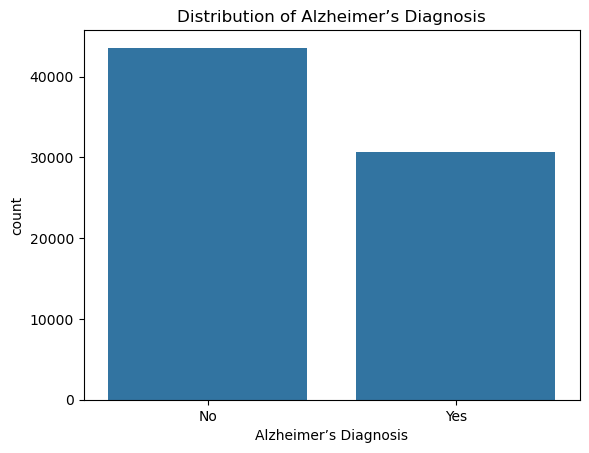

Alzheimer’s Diagnosis
No     0.586541
Yes    0.413459
Name: proportion, dtype: float64

In [12]:
# Count plot for Alzheimer’s Diagnosis
sns.countplot(data=df, x='Alzheimer’s Diagnosis')
plt.title('Distribution of Alzheimer’s Diagnosis')
plt.show()

# Check the value counts
df['Alzheimer’s Diagnosis'].value_counts(normalize=True)

Since the proportion is very close to 50/50 we can say that our dataset is balanced.

## Alzheimer's Prediction – Key Feature Analysis

In this section, we explore **three of the most important features** in relation to Alzheimer’s diagnosis:

1. **Age**  
2. **Family History of Alzheimer’s**  
3. **Genetic Risk Factor (APOE-ε4)**

We aim to understand how these features differ between individuals who have been diagnosed with Alzheimer’s and those who have not.  
This helps us interpret their predictive power and visualize their impact on classification.

Afterward, we briefly examine the importance of **secondary features** to evaluate whether they contribute meaningful patterns that can support prediction or improve model performance.

## 1. Age vs Alzheimer's Diagnosis

We analyze how age differs between individuals with and without Alzheimer’s. Below are two separate histograms with KDE curves to show the distribution.


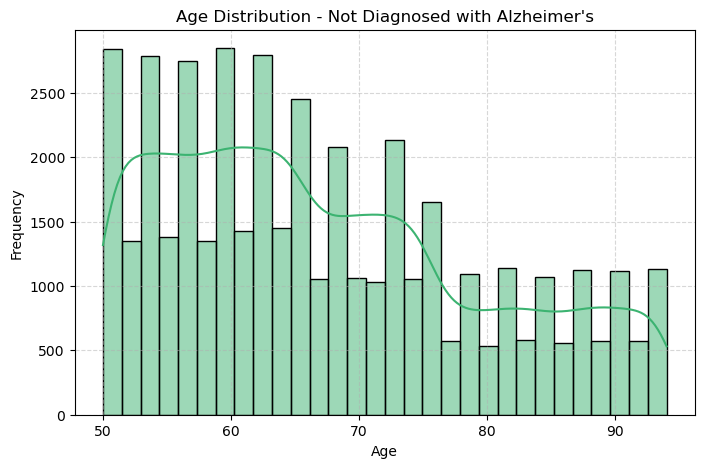

In [16]:
# Plot for 'No' (not diagnosed)
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df[df['Alzheimer’s Diagnosis'] == 'No'],
    x='Age',
    bins=30,
    kde=True,
    color='mediumseagreen',
    edgecolor='black'
)
plt.title("Age Distribution - Not Diagnosed with Alzheimer's")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

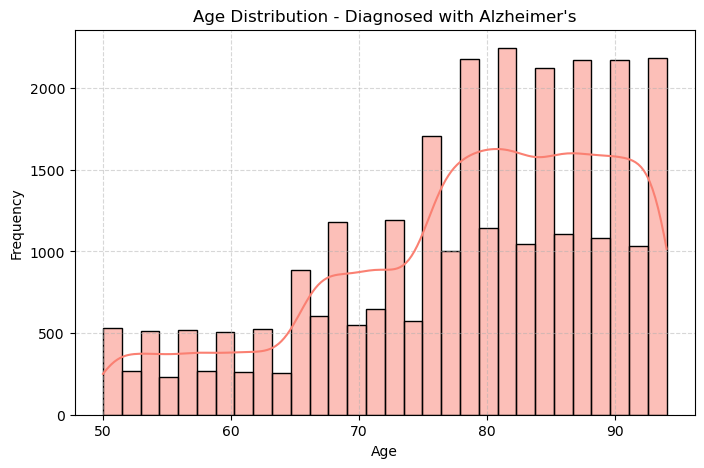

In [17]:
# Plot for 'Yes' (diagnosed)
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df[df['Alzheimer’s Diagnosis'] == 'Yes'],
    x='Age',
    bins=30,
    kde=True,
    color='salmon',
    edgecolor='black'
)
plt.title("Age Distribution - Diagnosed with Alzheimer's")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## 2. Family History vs Alzheimer's Diagnosis

Family history is a significant indicator of genetic or environmental predisposition. This countplot shows how diagnosis varies based on family history.


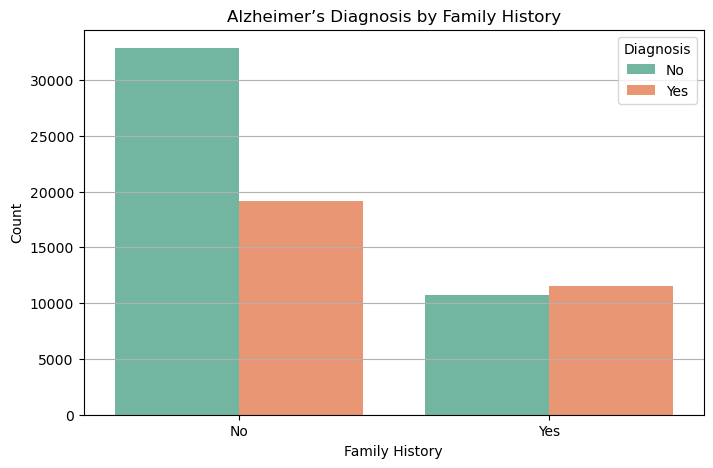

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Family History of Alzheimer’s', hue='Alzheimer’s Diagnosis', palette='Set2')
plt.title("Alzheimer’s Diagnosis by Family History")
plt.xlabel("Family History")
plt.ylabel("Count")
plt.legend(title="Diagnosis")
plt.grid(axis='y')
plt.show()


## 3. Genetic Risk Factor (APOE-ε4) vs Diagnosis

The APOE-ε4 allele is a well-known genetic risk factor. Below we show its relationship with Alzheimer’s diagnosis.


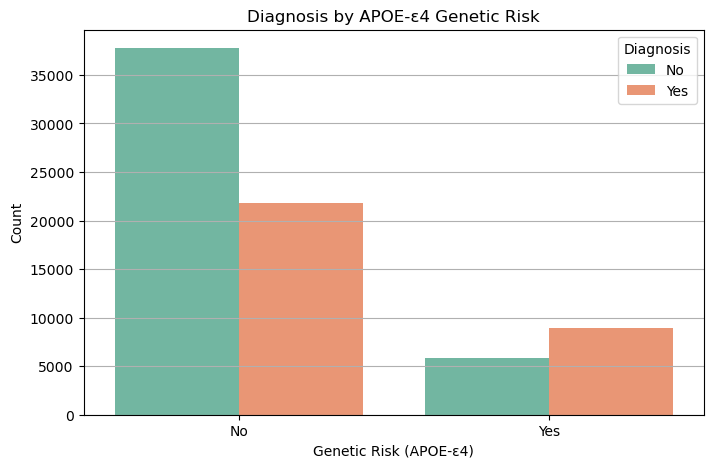

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Genetic Risk Factor (APOE-ε4 allele)', hue='Alzheimer’s Diagnosis', palette='Set2')
plt.title("Diagnosis by APOE-ε4 Genetic Risk")
plt.xlabel("Genetic Risk (APOE-ε4)")
plt.ylabel("Count")
plt.legend(title="Diagnosis")
plt.grid(axis='y')
plt.show()

# Secondary Features

### Demographic Features: Personal Identity

In this section, we analyze the impact of personal identity features such as **Gender** and **Marital Status** on the likelihood of Alzheimer's diagnosis.

The following plots show the distribution of these features, with the hue representing the Alzheimer's diagnosis outcome (Yes/No).


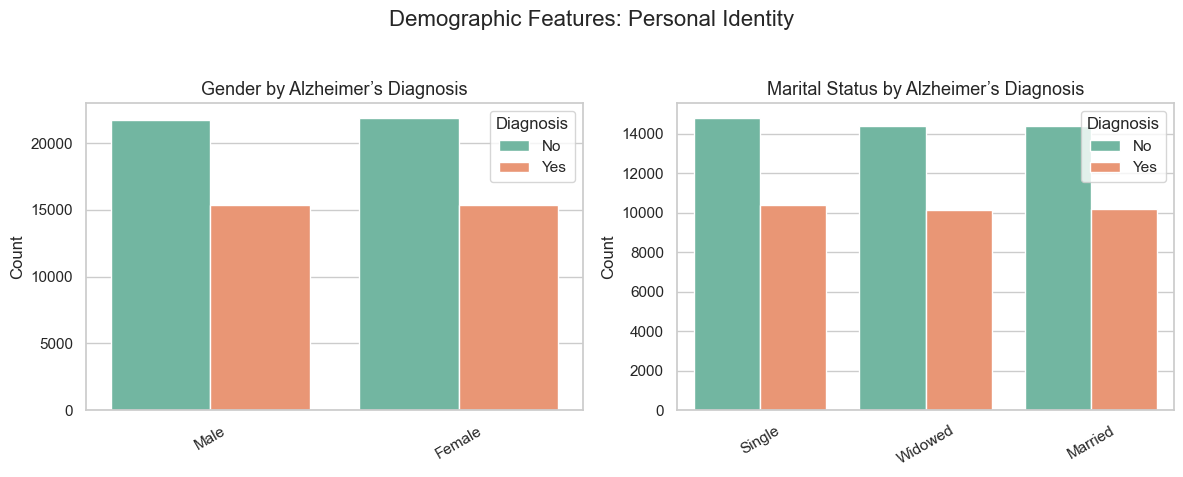

In [24]:
# Load dataset
df = pd.read_csv("alzheimers_prediction_dataset.csv")

# Personal Identity Features
personal_identity = ['Gender', 'Marital Status']

# Plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, len(personal_identity), figsize=(12, 5))

for i, feature in enumerate(personal_identity):
    sns.countplot(data=df, x=feature, hue='Alzheimer’s Diagnosis', ax=axes[i], palette='Set2')
    axes[i].set_title(f'{feature} by Alzheimer’s Diagnosis', fontsize=13)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].legend(title='Diagnosis')

plt.suptitle('Demographic Features: Personal Identity', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Demographic Features: Socioeconomic Status

This section explores how socioeconomic factors like **Employment Status**, **Income Level**, and **Urban vs Rural Living** influence Alzheimer's diagnosis. 

The visualizations below compare the counts for each feature, categorized by the Alzheimer's diagnosis outcome.


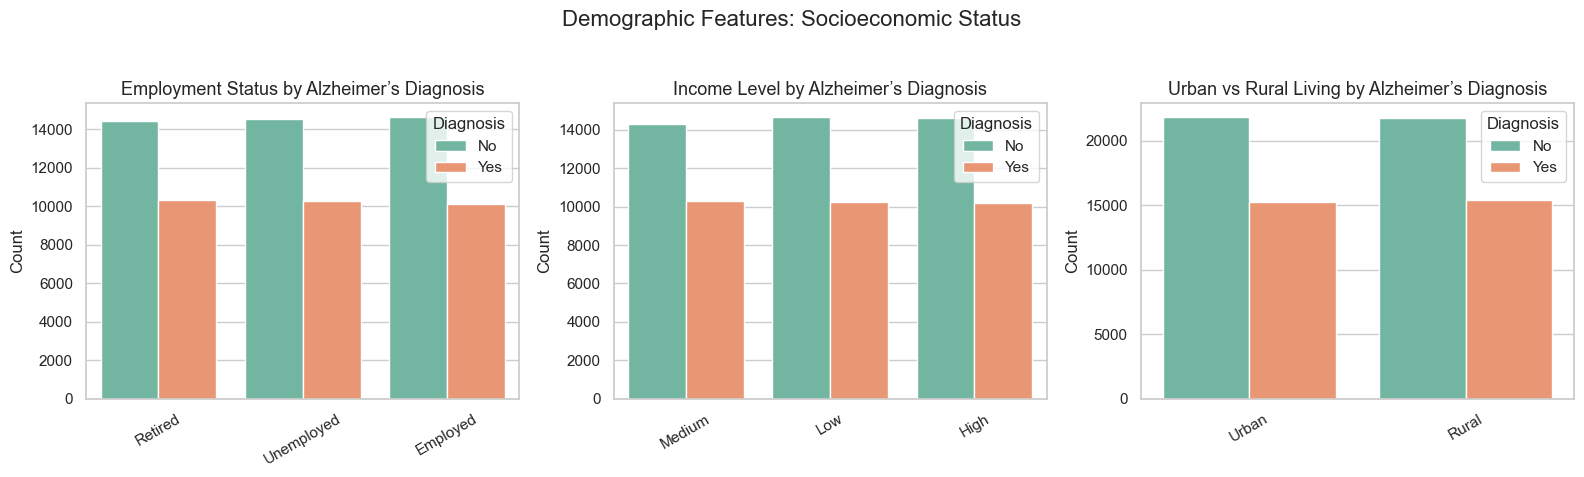

In [26]:
# Socioeconomic Status Features
socioeconomic_status = ['Employment Status', 'Income Level', 'Urban vs Rural Living']

# Plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, len(socioeconomic_status), figsize=(16, 5))

for i, feature in enumerate(socioeconomic_status):
    sns.countplot(data=df, x=feature, hue='Alzheimer’s Diagnosis', ax=axes[i], palette='Set2')
    axes[i].set_title(f'{feature} by Alzheimer’s Diagnosis', fontsize=13)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].legend(title='Diagnosis')

plt.suptitle('Demographic Features: Socioeconomic Status', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Education Level by Alzheimer’s Diagnosis

We now examine the relationship between **Education Level** and the likelihood of being diagnosed with Alzheimer's. Education is an important factor that can impact cognitive health and is often used in medical studies related to Alzheimer's.


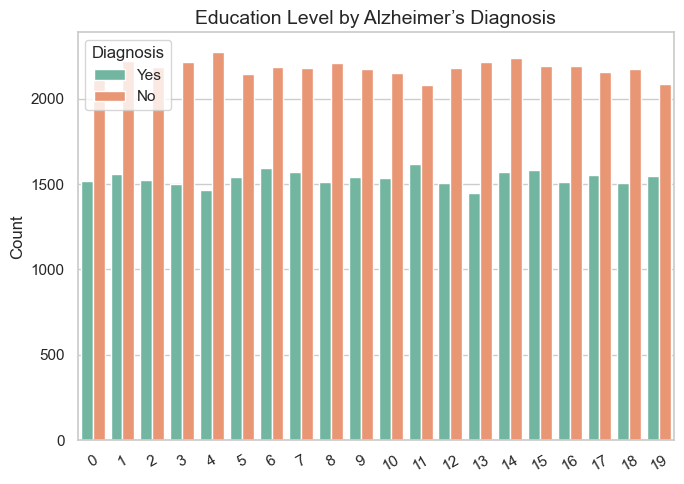

In [28]:
# Plot Education Level alone
sns.set(style="whitegrid")
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Education Level', hue='Alzheimer’s Diagnosis', palette='Set2')
plt.title('Education Level by Alzheimer’s Diagnosis', fontsize=14)
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()


### Socioeconomic & Lifestyle Factors: Social & Behavioral Elements

Here, we investigate social engagement and lifestyle factors, including **Social Engagement Level**, **Stress Levels**, and **Sleep Quality**, in relation to Alzheimer's diagnosis.

The following plots visualize the distribution of these features across both diagnosed and non-diagnosed individuals.


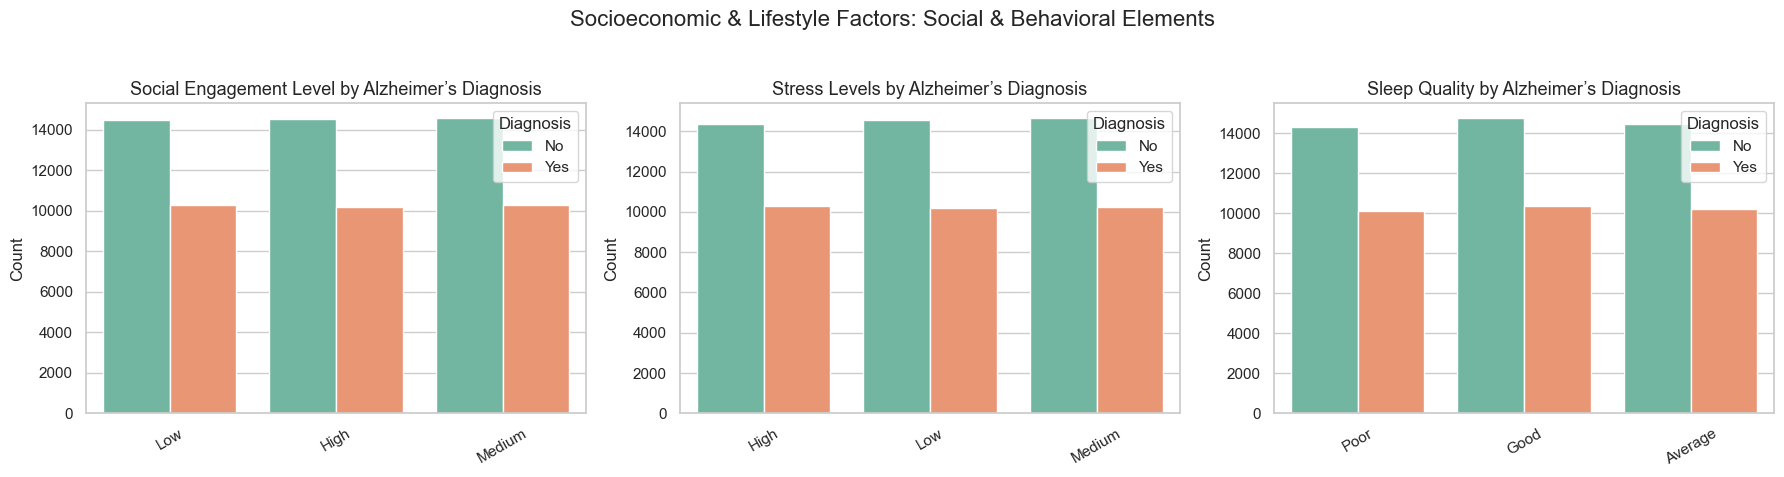

In [30]:
# Remaining Education & Social Engagement Features
social_factors = ['Social Engagement Level', 'Stress Levels', 'Sleep Quality']

# Plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, len(social_factors), figsize=(18, 5))

for i, feature in enumerate(social_factors):
    sns.countplot(data=df, x=feature, hue='Alzheimer’s Diagnosis', ax=axes[i], palette='Set2')
    axes[i].set_title(f'{feature} by Alzheimer’s Diagnosis', fontsize=13)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].legend(title='Diagnosis')

plt.suptitle('Socioeconomic & Lifestyle Factors: Social & Behavioral Elements', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Socioeconomic & Lifestyle Factors: Lifestyle & Behavioral Habits

This section delves into **Physical Activity Level**, **Smoking Status**, **Alcohol Consumption**, and **Dietary Habits** as lifestyle and behavioral factors associated with Alzheimer's diagnosis.

We explore these features to understand how these factors might affect the likelihood of developing Alzheimer's.


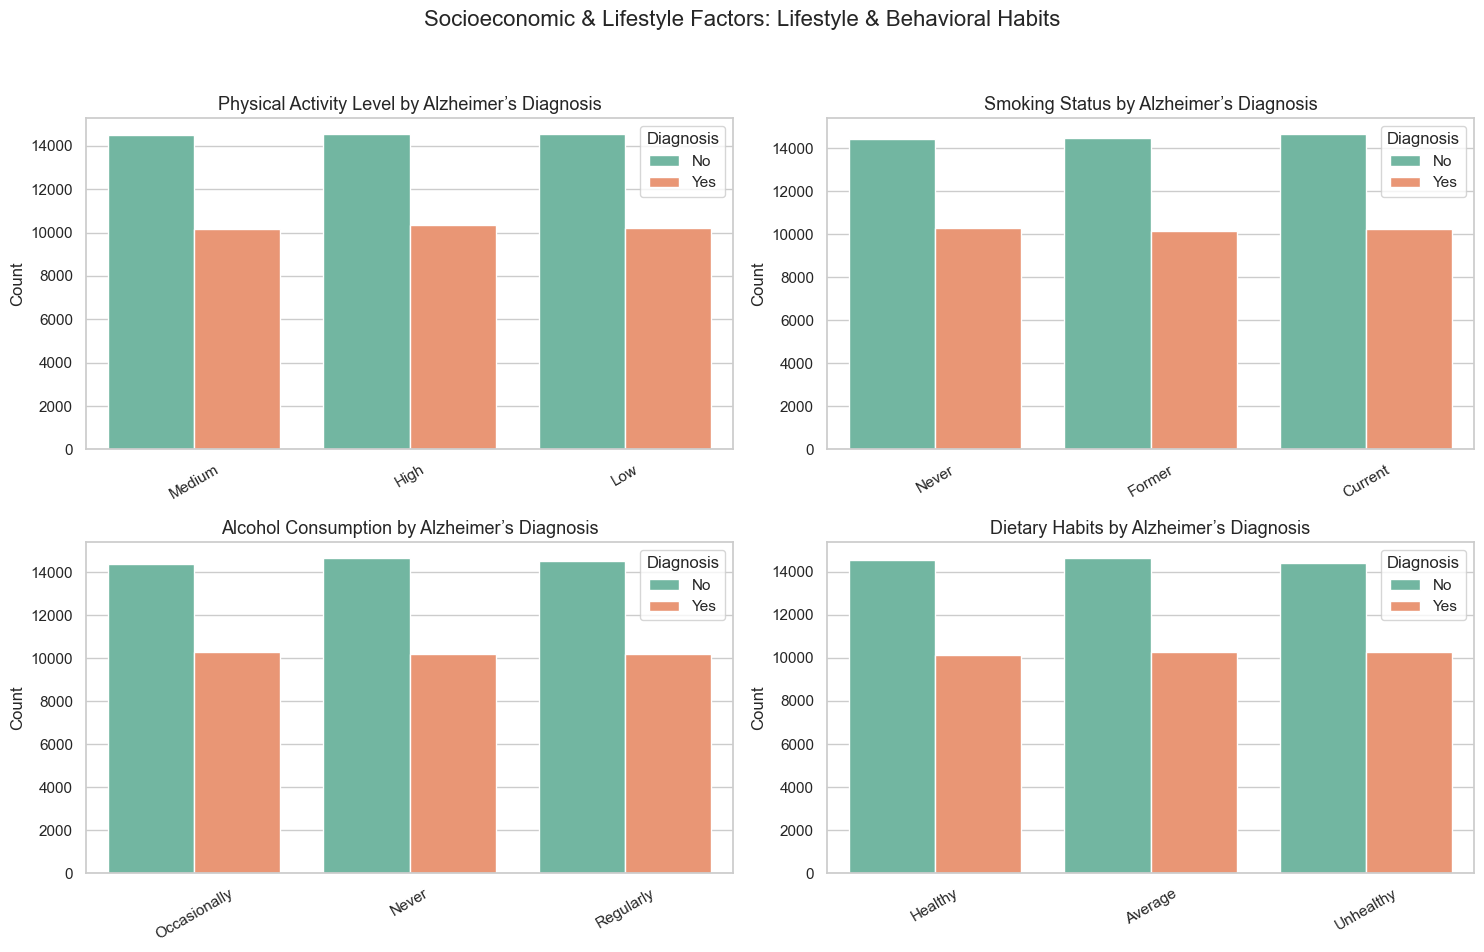

In [32]:
# Lifestyle & Behavioral Habits Features
lifestyle_habits = ['Physical Activity Level', 'Smoking Status', 'Alcohol Consumption', 'Dietary Habits']

# Plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid of subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, feature in enumerate(lifestyle_habits):
    sns.countplot(data=df, x=feature, hue='Alzheimer’s Diagnosis', ax=axes[i], palette='Set2')
    axes[i].set_title(f'{feature} by Alzheimer’s Diagnosis', fontsize=13)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].legend(title='Diagnosis')

plt.suptitle('Socioeconomic & Lifestyle Factors: Lifestyle & Behavioral Habits', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust spacing
plt.show()


### Health History & Conditions: Medical Conditions & Biometrics

In this section, we analyze how certain medical conditions and biometric measures, such as **Diabetes**, **Hypertension**, **Cholesterol Level**, and **Depression Level**, correlate with Alzheimer's diagnosis.

These features may serve as risk factors, and the plots help us visualize their distribution within the dataset.


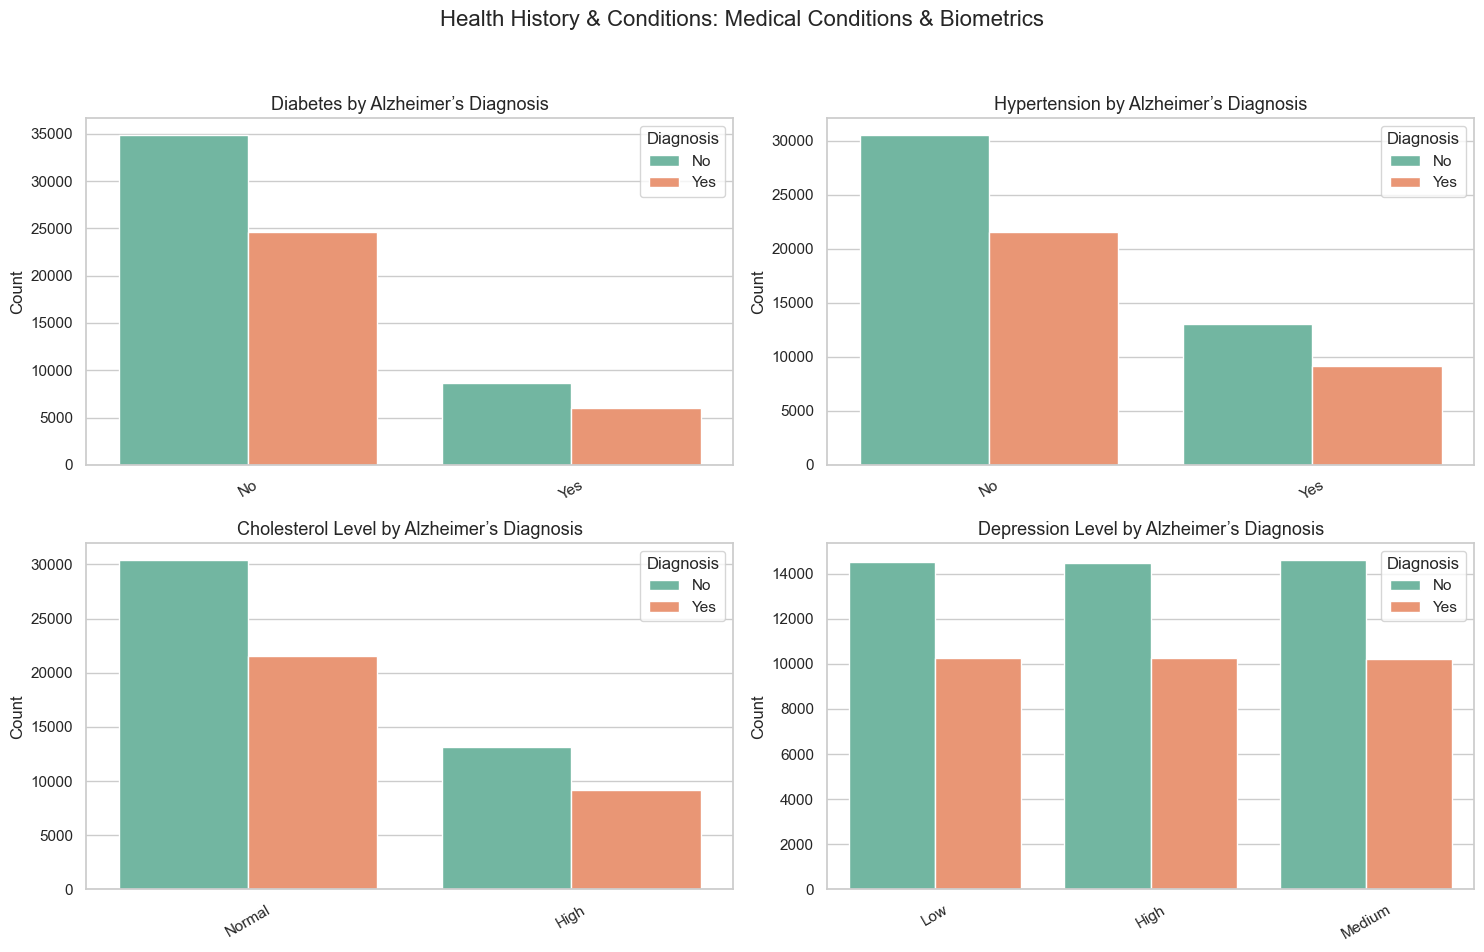

In [34]:
# Medical Conditions & Biometrics (without BMI)
medical_features = ['Diabetes', 'Hypertension', 'Cholesterol Level', 'Depression Level']

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid of subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, feature in enumerate(medical_features):
    sns.countplot(data=df, x=feature, hue='Alzheimer’s Diagnosis', ax=axes[i], palette='Set2')
    axes[i].set_title(f'{feature} by Alzheimer’s Diagnosis', fontsize=13)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].legend(title='Diagnosis')

plt.suptitle('Health History & Conditions: Medical Conditions & Biometrics', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust spacing
plt.show()


### Air Pollution Exposure by Alzheimer’s Diagnosis

Lastly, we examine the role of **Air Pollution Exposure** as an environmental risk factor in the context of Alzheimer's diagnosis. Environmental factors, such as air pollution, have been studied for their potential link to cognitive decline.


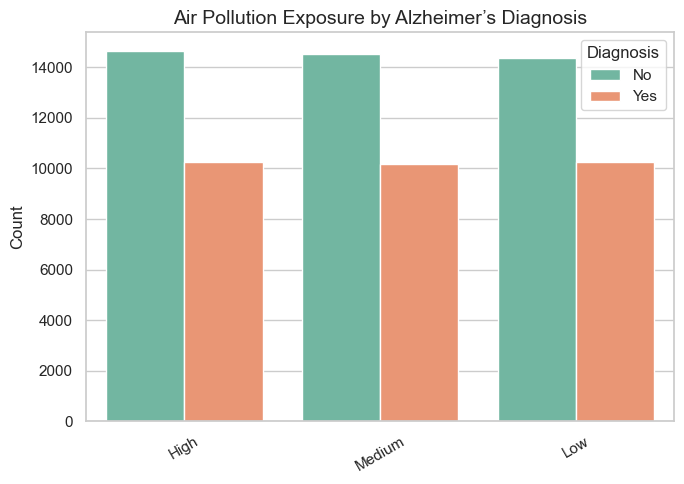

In [36]:
# Environmental Risk Factor
sns.set(style="whitegrid")
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Air Pollution Exposure', hue='Alzheimer’s Diagnosis', palette='Set2')
plt.title('Air Pollution Exposure by Alzheimer’s Diagnosis', fontsize=14)
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()


### Alzheimer’s Diagnosis Proportion by BMI

This stacked bar chart shows the proportion of individuals diagnosed with Alzheimer’s across different **BMI** values. Each bar represents a specific **BMI** (rounded to the nearest integer), and the sections within each bar indicate the relative frequencies of Alzheimer's vs. non-Alzheimer's cases.
.


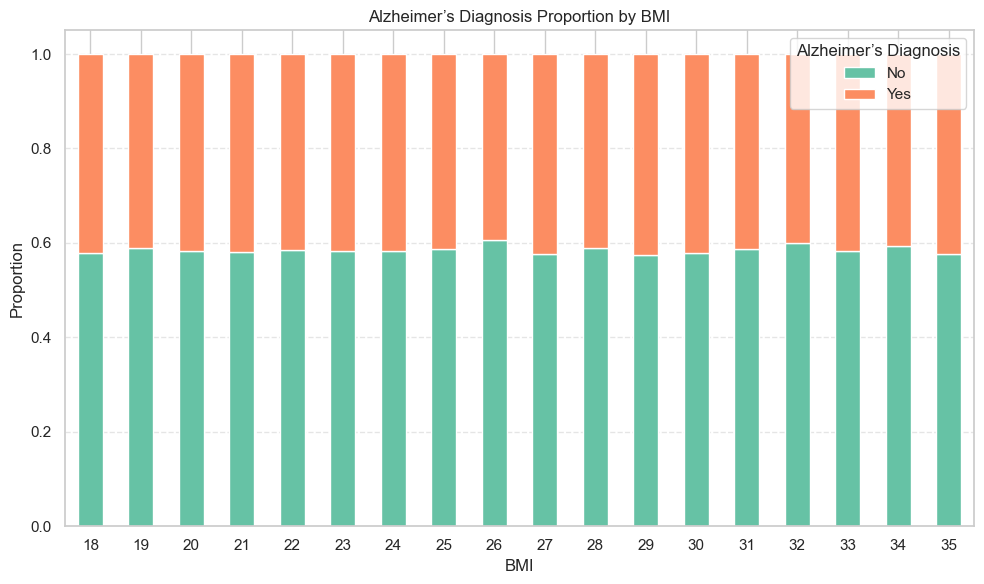

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create rounded BMI bins
df['BMI_rounded'] = df['BMI'].round(0).astype(int)

# Count per rounded BMI and diagnosis
bmi_diagnosis_counts = df.groupby(['BMI_rounded', 'Alzheimer’s Diagnosis']).size().unstack().fillna(0)

# Normalize within each BMI to get proportions
bmi_diagnosis_props = bmi_diagnosis_counts.div(bmi_diagnosis_counts.sum(axis=1), axis=0)

# Plot
bmi_diagnosis_props.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66c2a5', '#fc8d62'])
plt.title('Alzheimer’s Diagnosis Proportion by BMI')
plt.xlabel('BMI')
plt.ylabel('Proportion')
plt.legend(title='Alzheimer’s Diagnosis', loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




### Alzheimer’s Diagnosis by Country

This stacked bar chart displays the distribution of Alzheimer’s diagnoses across different countries in the dataset. Each bar represents a country, divided into proportions of individuals with and without an Alzheimer’s diagnosis. This visualization helps identify potential geographic trends or disparities in diagnosis rates.


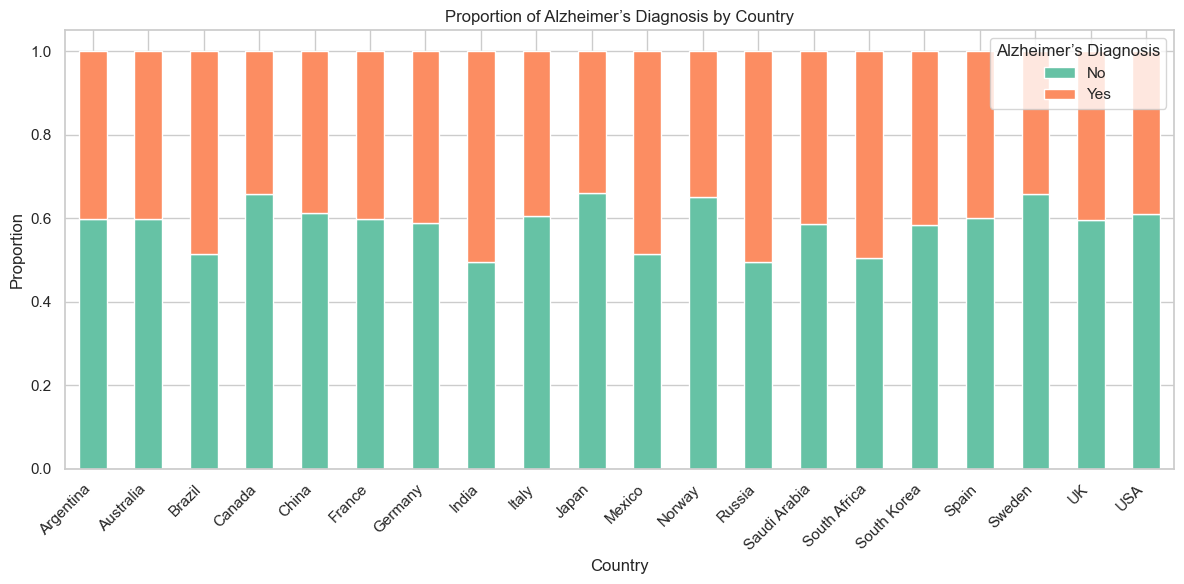

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of diagnoses by country and Alzheimer's diagnosis
country_diagnosis_counts = df.groupby(['Country', 'Alzheimer’s Diagnosis']).size().unstack().fillna(0)

# Normalize within each country to get proportions
country_diagnosis_props = country_diagnosis_counts.div(country_diagnosis_counts.sum(axis=1), axis=0)

# Plot the proportions using a bar plot
country_diagnosis_props.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#66c2a5', '#fc8d62'])

plt.title('Proportion of Alzheimer’s Diagnosis by Country')
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')  # Rotate for readability
plt.legend(title='Alzheimer’s Diagnosis', loc='upper right')
plt.tight_layout()
plt.show()



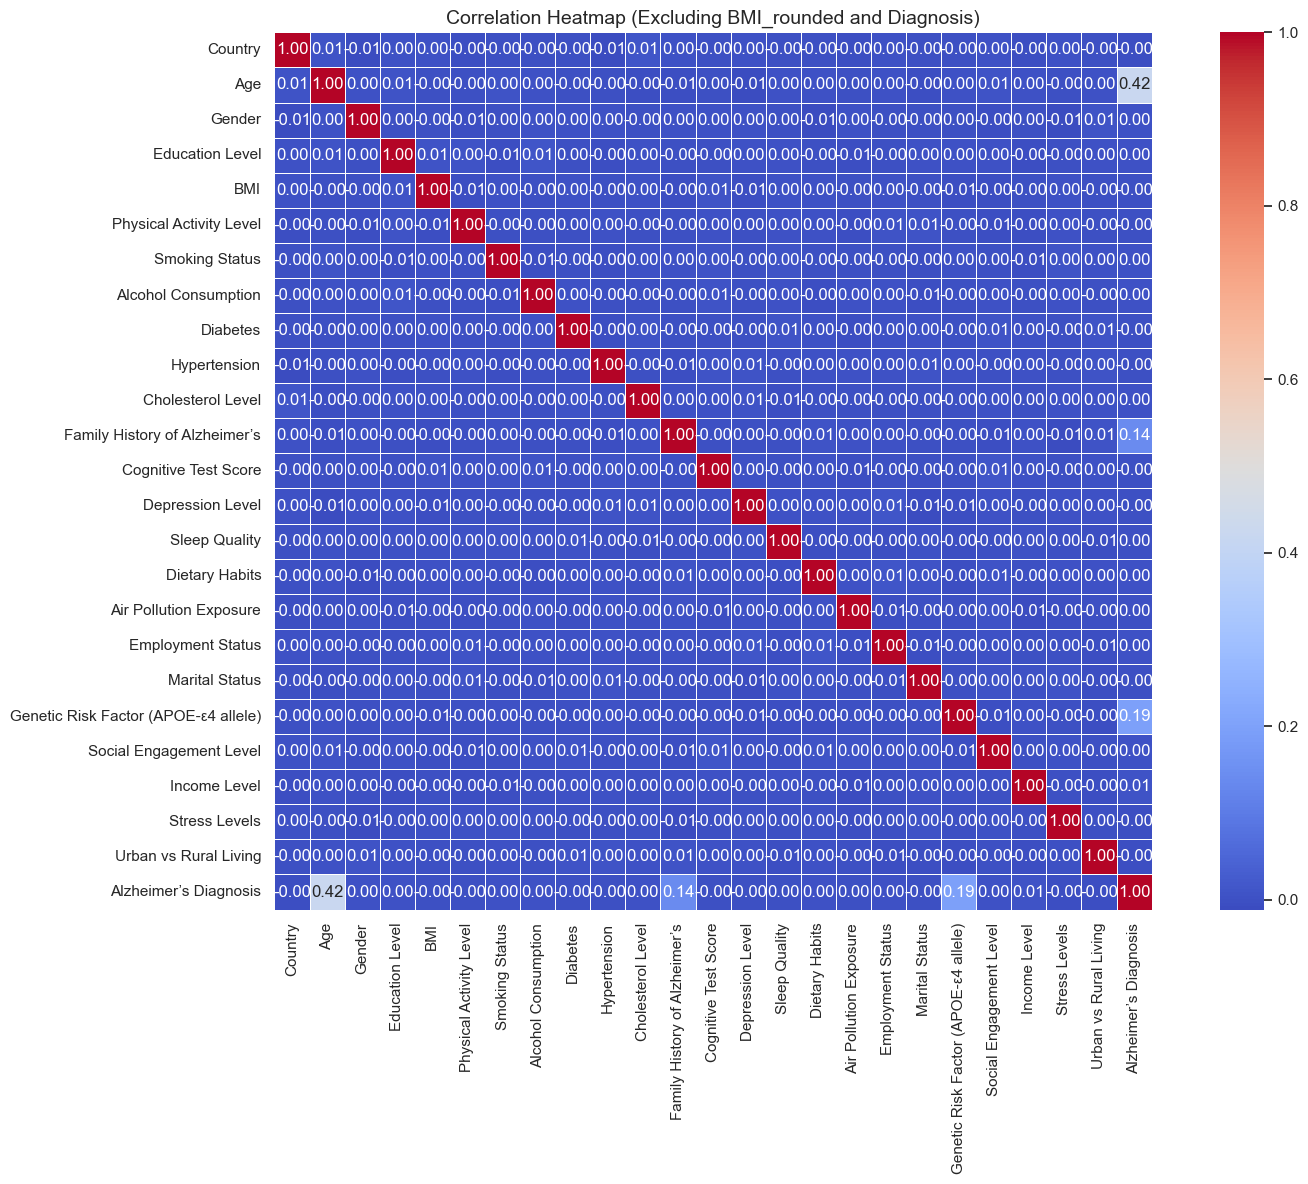

In [41]:
# Copy the original dataframe
df_corr = df.copy()

# Remove BMI_rounded if it exists
if "BMI_rounded" in df_corr.columns:
    df_corr.drop(columns=["BMI_rounded"], inplace=True)

# Encode the target variable
df_corr["Diagnosis_numeric"] = df_corr["Alzheimer’s Diagnosis"].map({"No": 0, "Yes": 1})

# Encode all categorical features (excluding already numeric ones)
categorical_cols = df_corr.select_dtypes(include='object').columns.tolist()
encoder = OrdinalEncoder()
df_corr[categorical_cols] = encoder.fit_transform(df_corr[categorical_cols])

# Drop the target from the correlation matrix (if you want to focus only on features)
features_only = df_corr.drop(columns=["Diagnosis_numeric"])

# Compute correlation matrix
corr_matrix = features_only.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap (Excluding BMI_rounded and Diagnosis)", fontsize=14)
plt.tight_layout()
plt.show()


### Correlation Heatmap of All Features

To better understand the linear relationships between features in our dataset, we encoded all categorical variables using `OrdinalEncoder` and computed a **Pearson correlation matrix**. The heatmap below displays the correlations between all features, **excluding the BMI_rounded column and the diagnosis target**.

Each cell represents the correlation coefficient between two variables:
- Values close to **+1** indicate a strong positive correlation
- Values near **0** suggest no linear correlation
- Values close to **-1** indicate a strong negative correlation

Some interesting observations from the heatmap:
- **Age** has the highest correlation with the Alzheimer’s diagnosis (**~0.42**), confirming that age is a major risk factor.
- **Family History of Alzheimer’s** shows a **moderate positive correlation** with diagnosis, reinforcing its role as a genetic or environmental predictor.
- The **Genetic Risk Factor (APOE-ε4 allele)** also shows **a positive association** with Alzheimer’s, which aligns with medical research linking the APOE-ε4 allele to increased risk.

This heatmap helps us in **feature selection**, identifying **redundancies**, and understanding which features might have the most predictive power for Alzheimer’s diagnosis.
